# Plotting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [ ]:
!pip install eztao

     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 10.3 MB 46.2 MB/s 
     |████████████████████████████████| 296 kB 55.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### under

In [ ]:
lsst_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/time dilation/lsst_under_redshift_all.csv')
srnn_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/time dilation/srnn_under_redshift_all.csv')
z_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/underDHO_1075.csv')

In [ ]:
# remove time dilation effect
srnn_df_new = srnn_df.copy()
n = 0
while n < len(srnn_df):
  srnn_id = srnn_df['id'][n]
  z = z_df[z_df.id == srnn_id]['redshift'].values[0]
  for i in np.arange(30):
    srnn_df_new.at[n+i,'qpo_srnn'] = srnn_df['qpo_srnn'][n+i]/(1+z)
    srnn_df_new.at[n+i,'dqpo_srnn'] = srnn_df['dqpo_srnn'][n+i]/(1+z)
    srnn_df_new.at[n+i,'decay_srnn'] = srnn_df['decay_srnn'][n+i]/(1+z)

  n += 30

srnn_df = srnn_df_new
lsst_df_new = lsst_df.copy()
n = 0
while n < len(srnn_df):
  lsst_id = lsst_df['id'][n]
  z = z_df[z_df.id == lsst_id]['redshift'].values[0]
  for i in np.arange(30):
    lsst_df_new.at[n+i,'qpo_lsst'] = lsst_df['qpo_lsst'][n+i]/(1+z)
    lsst_df_new.at[n+i,'dqpo_lsst'] = lsst_df['dqpo_lsst'][n+i]/(1+z)
    lsst_df_new.at[n+i,'decay_lsst'] = lsst_df['decay_lsst'][n+i]/(1+z)

  n += 30
lsst_df = lsst_df_new
del lsst_df_new, srnn_df_new

In [ ]:
lsst_df['id'] = lsst_df['id'].astype('int32')
lsst_df = lsst_df.round({'qpo_lsst': 3, 'dqpo_lsst': 3, 'decay_lsst': 3, 'sf_lsst': 3, 'qpo_in': 3, 'dqpo_in': 3, 'decay_in':3, 'sf_in':3})
lsst_df = lsst_df.drop('Unnamed: 0', axis = 1).drop('Unnamed: 0.1', axis = 1)

In [ ]:
srnn_df['id'] = srnn_df['id'].astype('int32')
srnn_df = srnn_df.round({'qpo_srnn': 3, 'dqpo_srnn': 3, 'decay_srnn': 3, 'sf_srnn': 3, 'qpo_in': 3, 'dqpo_in': 3, 'decay_in':3, 'sf_in':3})
srnn_df = srnn_df.drop('Unnamed: 0', axis = 1).drop('Unnamed: 0.1', axis = 1)

In [ ]:
df = pd.merge(lsst_df, srnn_df, on=["id", "band","cadence","decay_in","qpo_in", "dqpo_in","sf_in"])
df

qpo_lsst  dqpo_lsst  decay_lsst  ...  dqpo_srnn decay_srnn  sf_srnn
0        71.313     71.767     101.068  ...     69.734    182.672    0.099
1        72.269     72.483     149.933  ...     67.276    116.630    0.085
2        64.415     64.573     146.750  ...     69.372    120.065    0.089
3        70.941     71.220     127.651  ...     68.997    151.695    0.095
4        69.563     69.829     127.007  ...     67.156    189.963    0.132
...         ...        ...         ...  ...        ...        ...      ...
11995    21.511     21.512     525.086  ...     32.142     32.388    0.065
11996    21.490     21.491     393.144  ...     31.665     35.976    0.058
11997    21.531     21.532     295.901  ...     37.554     35.560    0.067
11998    21.431     21.432     384.578  ...     30.151     38.806    0.057
11999    21.482     21.486     194.222  ...     37.016     36.216    0.064

[12000 rows x 15 columns]

In [ ]:
df.to_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/under_all_redshift.csv')

In [ ]:
df_under = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/under_all_redshift.csv')
df_under

Unnamed: 0  qpo_lsst  dqpo_lsst  ...  dqpo_srnn  decay_srnn sf_srnn
0               0    71.313     71.767  ...     69.734     182.672   0.099
1               1    72.269     72.483  ...     67.276     116.630   0.085
2               2    64.415     64.573  ...     69.372     120.065   0.089
3               3    70.941     71.220  ...     68.997     151.695   0.095
4               4    69.563     69.829  ...     67.156     189.963   0.132
...           ...       ...        ...  ...        ...         ...     ...
11995       11995    21.511     21.512  ...     32.142      32.388   0.065
11996       11996    21.490     21.491  ...     31.665      35.976   0.058
11997       11997    21.531     21.532  ...     37.554      35.560   0.067
11998       11998    21.431     21.432  ...     30.151      38.806   0.057
11999       11999    21.482     21.486  ...     37.016      36.216   0.064

[12000 rows x 16 columns]

In [ ]:
band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

under_dist = {}
for band in band_list:
  under_dist[band] = []
  for cadence in cadence_list:
    sel_df = df[(df.cadence==cadence)&(df.band==band)].dropna()
    sel_df = sel_df[(sel_df.decay_srnn<1e4)&(sel_df.decay_lsst<1e4)]
    result = (abs(sel_df['decay_srnn'] - sel_df['decay_lsst'])/sel_df['decay_in']+
          abs(sel_df['qpo_srnn'] - sel_df['qpo_lsst'])/sel_df['qpo_in']+
          abs(sel_df['dqpo_srnn'] - sel_df['dqpo_lsst'])/sel_df['dqpo_in']+
          abs(sel_df['sf_srnn'] - sel_df['sf_lsst'])/sel_df['sf_in']).mean()
    under_dist[band].append(result)
    
under_dist

{'g': [1.3204195095060955,
  1.3235330159338916,
  1.1680923323378896,
  1.2806080936831563,
  1.9498506753782077],
 'i': [0.9661391443501822,
  0.9569471479559566,
  0.9728534936859147,
  0.9982855100815006,
  0.9858731762531748],
 'r': [0.9368374989881747,
  0.8988812301439774,
  0.9249317940782027,
  1.0028473378934897,
  0.8839025710465215],
 'u': [1.7855550959591402,
  1.902306722362419,
  1.937108538257937,
  1.873692054728894,
  1.213414804874483],
 'y': [1.3833269295610005,
  1.416006149171366,
  1.4702519236822558,
  1.6127475270032934,
  1.4644705019212356],
 'z': [1.1716834268230143,
  1.1618700420122783,
  1.2245587524818193,
  1.243120955918669,
  1.166886037350999]}

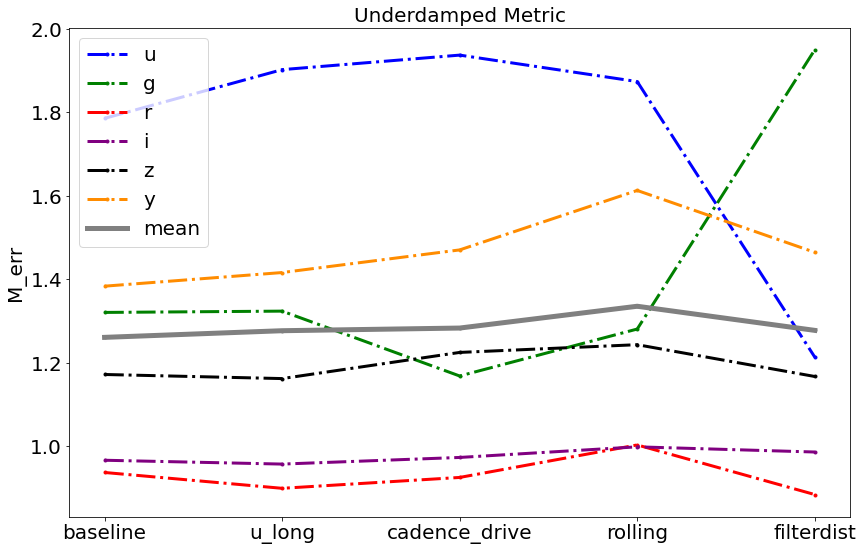

In [ ]:
plt.figure(figsize=(14,9))

for band in band_list:
  plt.plot(np.arange(5), under_dist[band], '-.', marker = '.',color = band_color[band], label = band, linewidth = 3)


mean_cad = []
for i in np.arange(5):
  acc = 0
  for band in band_list:
    acc += under_dist[band][i]
  mean_cad.append(acc/6)

plt.plot(np.arange(5), mean_cad, marker = '.',  color = 'grey', linewidth = 5, label = 'mean')
plt.title('Underdamped Metric', fontsize = 20)
plt.legend(fontsize = 20)
plt.ylabel('M_err', fontsize = 20)
plt.xticks(np.arange(5), cadence_list, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
mean_cad

[1.260660267531268,
 1.2765907179299816,
 1.2829661390873366,
 1.335216913218167,
 1.2773996278041035]

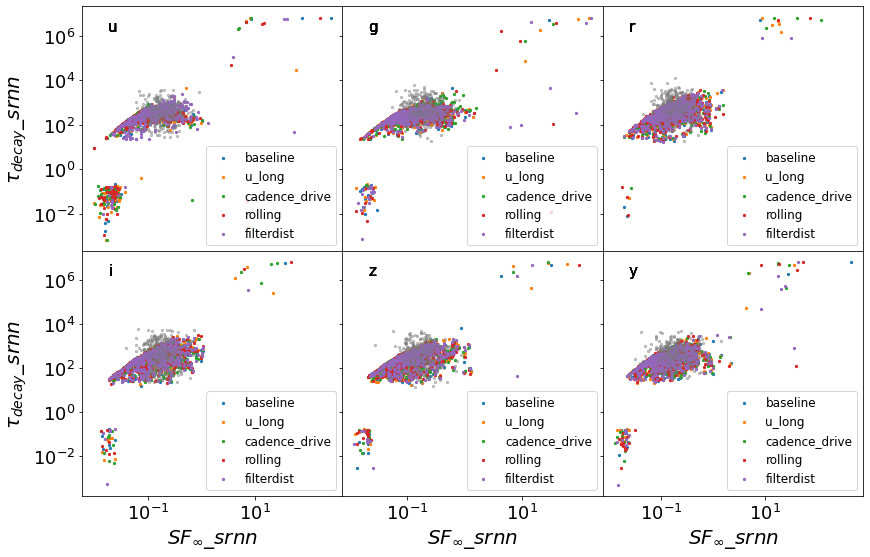

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14,9),sharex='col',sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
band_list = ['u','g','r','i','z','y']
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']
n = 0
for row in np.arange(2):
  for col in np.arange(3):
    ax = axs[row, col]
    for cad in cadence_list:
      sel_df = srnn_df[(srnn_df.cadence==cad)&(srnn_df.band==band_list[n])]
      ax.scatter(sel_df['sf_srnn'], sel_df['decay_srnn'], label = cad, s = 5)
      ax.scatter(sel_df['sf_in'], sel_df['decay_in'], color = 'grey', alpha = 0.1, s = 5)
      ax.text(0.1, 0.9, transform=ax.transAxes, s = band_list[n], fontsize = 15)
      ax.set_yscale('log') 
      ax.set_xscale('log') 
      # ax.set_xlim([1e-2, 2])
      # ax.set_ylim(0, 3650)
      ax.tick_params(axis="x", labelsize=18)
      ax.tick_params(axis="y", labelsize=18)
            
    ax.legend(loc = 'lower right', fontsize = 12)
    if row == 1:
      ax.set_xlabel(r'$SF_{\infty}\_srnn$', fontsize = 20)
    if col == 0:
      ax.set_ylabel(r'$\tau_{decay}\_srnn$', fontsize = 20)
    n += 1
plt.show()

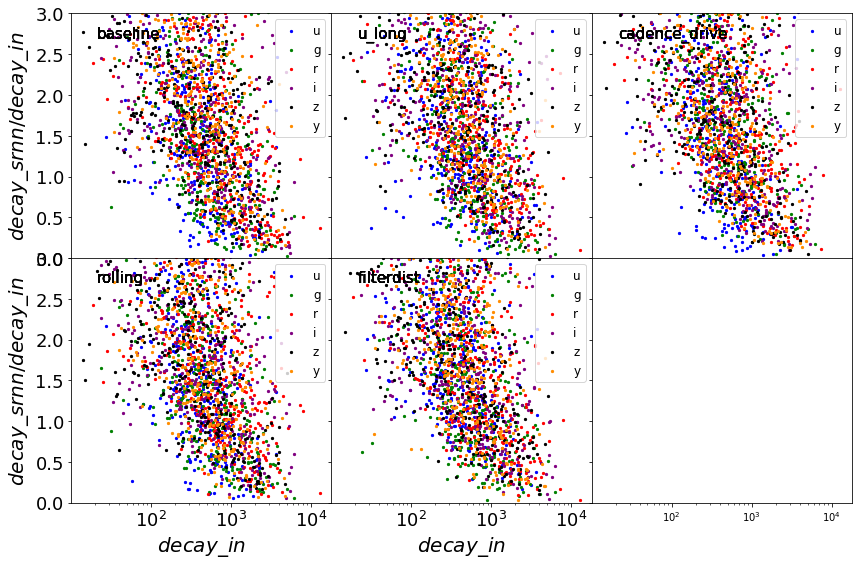

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14,9),sharex='col',sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

n = 0
for row in np.arange(2):
  for col in np.arange(3):
    ax = axs[row, col]
    if n<5:
      for band in band_list:
        sel_df = lsst_df[(lsst_df.cadence==cadence_list[n])&(lsst_df.band==band)]
        ax.scatter(sel_df['decay_in'], sel_df['decay_lsst']/sel_df['decay_in'], label = band, s = 5, color = band_color[band])
        ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
        # ax.set_yscale('log') 
        ax.set_xscale('log') 
        ax.set_ylim(0,3)
        # ax.set_xlim(0, 3650)
        # ax.set_ylim(0, 3650)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)
              
      ax.legend(loc = 'upper right', fontsize = 12)
      if row == 1:
        ax.set_xlabel(r'$decay\_in$', fontsize = 20)
      if col == 0:
        ax.set_ylabel(r'$decay\_srnn/decay\_in$', fontsize = 20)
      # if row == 1 and col == 2:
      #   ax.set_xticks([])
      #   ax.set_yticks([])
      #   ax.set_axis('off')
    n += 1
plt.show()

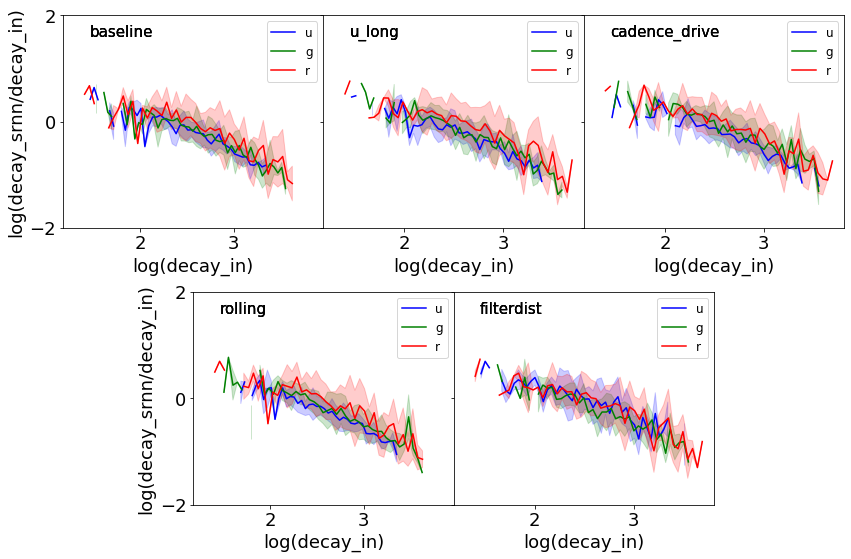

In [ ]:
from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny


# band_list = ['u']
band_list = ['u','g','r']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]



n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()

    x = np.log10(sel_df['decay_in']).tolist()
    y = np.log10(sel_df['decay_srnn']/sel_df['decay_in']).tolist()
    x, y = remove_outlier(x, y)
 
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band)
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(decay_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.set_yticks([-2, 0, 2])
    ax.set_ylim(-2, 2)
     
  ax.legend(loc = 'upper right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(decay_srnn/decay_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

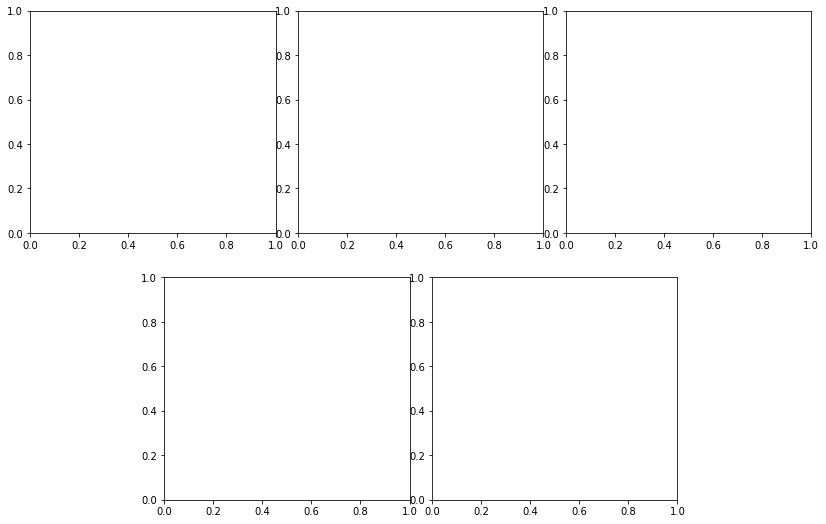

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

Text(0, 0.5, 'decay_srnn/decay_in')

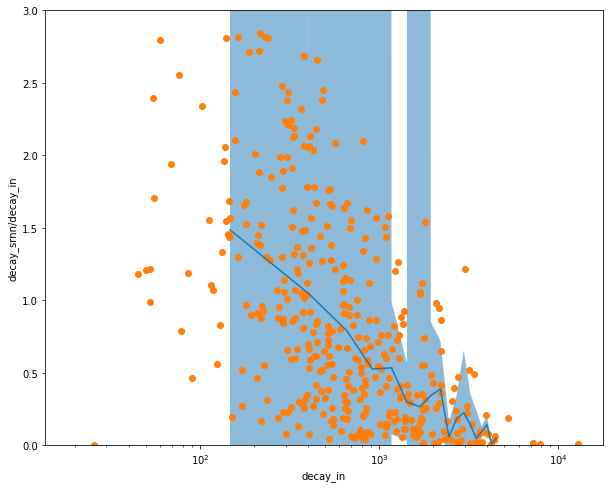

In [ ]:
from scipy import stats

plt.figure(figsize = (10,8))

decay_srnn = srnn_df[(srnn_df.cadence=='u_long')&(srnn_df.band=='r')]['decay_srnn']
decay_in = srnn_df[(srnn_df.cadence=='u_long')&(srnn_df.band=='r')]['decay_in']
x = decay_in
y = decay_srnn/decay_in
smooth_data = stats.binned_statistic(x,y,'median',bins=50)
standard_deviation = stats.binned_statistic(x,y,'std',bins=50)
bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
plt.plot(bin_centres,smooth_data[0])
plt.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.5)
plt.scatter(x, y)
plt.ylim(0,3)
plt.xscale('log')
plt.xlabel('decay_in')
plt.ylabel('decay_srnn/decay_in')

# Over

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

lsst_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/time dilation/lsst_over_redshift_all.csv')
srnn_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/time dilation/srnn_over_redshift_all.csv')
z_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/overDHO_400.csv')


In [ ]:
# remove time dilation effect
srnn_df_new = srnn_df.copy()
n = 0
while n < len(srnn_df):
  srnn_id = srnn_df['id'][n]
  z = z_df[z_df.id == srnn_id]['redshift'].values[0]
  for i in np.arange(30):
    srnn_df_new.at[n+i,'rise_srnn'] = srnn_df['rise_srnn'][n+i]/(1+z)
    srnn_df_new.at[n+i,'decay_srnn'] = srnn_df['decay_srnn'][n+i]/(1+z)

  n += 30

srnn_df = srnn_df_new

In [ ]:
lsst_df_new = lsst_df.copy()
n = 0
while n < len(srnn_df):
  lsst_id = lsst_df['id'][n]
  z = z_df[z_df.id == lsst_id]['redshift'].values[0]
  for i in np.arange(30):
    lsst_df_new.at[n+i,'rise_lsst'] = lsst_df['rise_lsst'][n+i]/(1+z)
    lsst_df_new.at[n+i,'decay_lsst'] = lsst_df['decay_lsst'][n+i]/(1+z)

  n += 30
lsst_df = lsst_df_new
del lsst_df_new, srnn_df_new

In [ ]:
lsst_df['id'] = lsst_df['id'].astype('int32')
lsst_df = lsst_df.round({'rise_lsst': 3, 'decay_lsst': 3, 'sf_lsst': 3, 'rise_in': 3, 'decay_in':3, 'sf_in':3})
lsst_df = lsst_df.drop('Unnamed: 0', axis = 1).drop('Unnamed: 0.1', axis = 1)

In [ ]:
srnn_df['id'] = srnn_df['id'].astype('int32')
srnn_df = srnn_df.round({'rise_srnn': 3, 'decay_srnn': 3, 'sf_srnn': 3, 'rise_in': 3, 'decay_in':3, 'sf_in':3})
srnn_df = srnn_df.drop('Unnamed: 0', axis = 1).drop('Unnamed: 0.1', axis = 1)

In [ ]:
df = pd.merge(lsst_df, srnn_df, on=["id", "band","cadence","decay_in","rise_in", "sf_in"])
df

rise_lsst  decay_lsst  sf_lsst  ... rise_srnn  decay_srnn  sf_srnn
0          0.082      47.207    0.102  ...     0.029     413.500    0.067
1          0.037      42.168    0.082  ...     0.112     392.469    0.056
2         80.844     125.350    0.100  ...     0.258     417.212    0.063
3          2.647      51.249    0.093  ...     0.146     502.434    0.063
4          0.180      31.643    0.097  ...     0.034     224.599    0.077
...          ...         ...      ...  ...       ...         ...      ...
11750     27.383     149.646    0.133  ...       NaN         NaN    0.125
11751      1.440      57.963    0.139  ...       NaN         NaN    0.121
11752     11.789     162.374    0.122  ...     0.068     382.534    0.107
11753      0.794      60.477    0.130  ...     0.001     332.186    0.099
11754     27.841     160.474    0.134  ...     0.004     400.590    0.117

[11755 rows x 12 columns]

In [ ]:
df.to_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/over_all_redshift.csv')

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/over_all_redshift.csv')
df

Unnamed: 0  rise_lsst  decay_lsst  ...  rise_srnn decay_srnn  sf_srnn
0               0      0.082      47.207  ...      0.029    413.500    0.067
1               1      0.037      42.168  ...      0.112    392.469    0.056
2               2     80.844     125.350  ...      0.258    417.212    0.063
3               3      2.647      51.249  ...      0.146    502.434    0.063
4               4      0.180      31.643  ...      0.034    224.599    0.077
...           ...        ...         ...  ...        ...        ...      ...
11750       11750     27.383     149.646  ...        NaN        NaN    0.125
11751       11751      1.440      57.963  ...        NaN        NaN    0.121
11752       11752     11.789     162.374  ...      0.068    382.534    0.107
11753       11753      0.794      60.477  ...      0.001    332.186    0.099
11754       11754     27.841     160.474  ...      0.004    400.590    0.117

[11755 rows x 13 columns]

In [ ]:
band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

over_dist = {}
for band in band_list:
  over_dist[band] = []
  for cadence in cadence_list:
    sel_df = df[(df.cadence==cadence)&(df.band==band)].dropna()
    sel_df = sel_df[(sel_df.decay_srnn<1e4)&(sel_df.decay_lsst<1e4)]
    result = (abs(sel_df['decay_srnn'] - sel_df['decay_lsst'])/sel_df['decay_in']+
          abs(sel_df['rise_srnn'] - sel_df['rise_lsst'])/sel_df['rise_in']+
          abs(sel_df['sf_srnn'] - sel_df['sf_lsst'])/sel_df['sf_in']).mean()
    over_dist[band].append(result)
    
over_dist

{'g': [4.696930838069048,
  5.269507651938599,
  3.282122755730584,
  5.235455461748832,
  5.247219956771175],
 'i': [2.6080186494482254,
  2.1657623863651936,
  2.4236212887348443,
  2.3338345146380552,
  2.381654693156817],
 'r': [2.226333478360048,
  2.306995053028615,
  2.3652747230974156,
  2.431258302914042,
  2.589272425354],
 'u': [9.546129769643535,
  9.178954175461032,
  10.342267343705297,
  8.964707602043305,
  4.541387256320311],
 'y': [2.9517661181923804,
  3.36398439553594,
  2.576925035015835,
  3.1798862658004805,
  3.3881061185062173],
 'z': [2.7574295292571325,
  2.592488103105932,
  2.737143274389936,
  3.1799843039251385,
  2.622592537915148]}

In [ ]:
mean_cad = []
for i in np.arange(5):
  acc = 0
  for band in band_list:
    acc += over_dist[band][i]
  mean_cad.append(acc/6)

In [ ]:
spoke_labels

['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

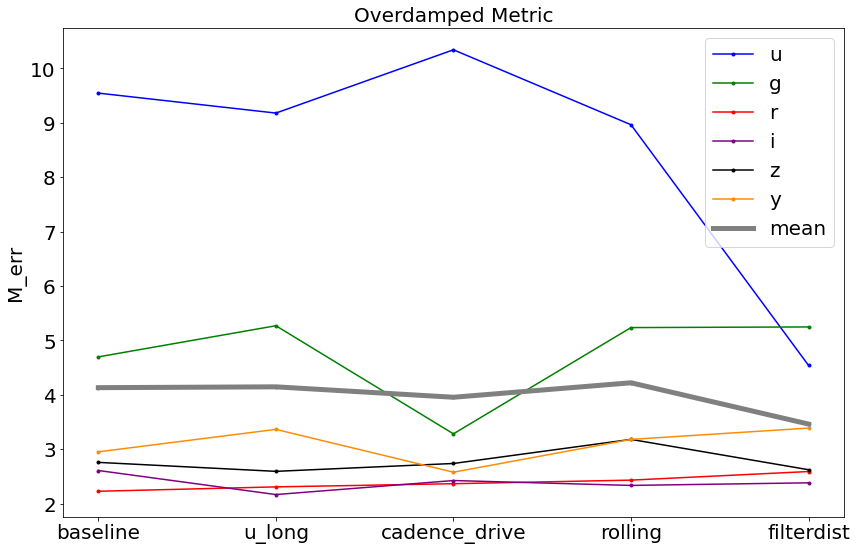

In [ ]:
plt.figure(figsize=(14,9))

for band in band_list:
  plt.plot(np.arange(5), over_dist[band], '-', marker = '.', color = band_color[band], label = band)

mean_cad = []
for i in np.arange(5):
  acc = 0
  for band in band_list:
    acc += over_dist[band][i]
  mean_cad.append(acc/6)


plt.plot(np.arange(5), mean_cad, marker = '.', linewidth = 5, color = 'grey', label = 'mean')
plt.title('Overdamped Metric', fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 20)
plt.ylabel('M_err', fontsize = 20)
plt.xticks(np.arange(5), cadence_list, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

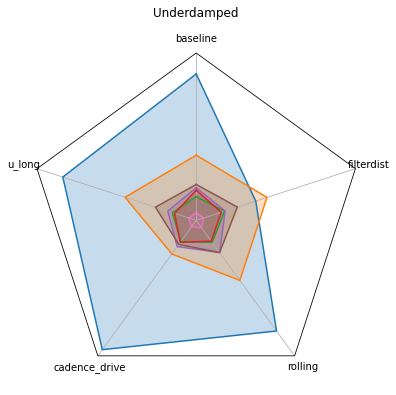

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

data_list = []
for band in over_dist:
  data_list.append(over_dist[band])

data_list.append(mean_cad)

data = [cadence_list, 
        (
            'Underdamped', data_list
        )
        
]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title,  position=(0.5, 1.1), horizontalalignment='center', verticalalignment='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()

In [ ]:
spoke_labels

('Underdamped',
 [[9.546129769643535,
   9.178954175461032,
   10.342267343705297,
   8.964707602043305,
   4.541387256320311],
  [4.696930838069048,
   5.2695076519386,
   3.282122755730584,
   5.235455461748832,
   5.247219956771175],
  [2.226333478360048,
   2.306995053028615,
   2.3652747230974156,
   2.431258302914042,
   2.5892724253540003],
  [2.6080186494482254,
   2.1657623863651936,
   2.423621288734844,
   2.3338345146380557,
   2.381654693156817],
  [2.7574295292571325,
   2.5924881031059317,
   2.737143274389936,
   3.1799843039251385,
   2.6225925379151485],
  [2.9517661181923804,
   3.36398439553594,
   2.576925035015835,
   3.1798862658004805,
   3.388106118506218],
  [1.260660267531268,
   1.2765907179299816,
   1.2829661390873366,
   1.335216913218167,
   1.2773996278041035]])

In [ ]:
sel_df['decay_srnn']

12       4226527.058
42           524.569
67          2031.649
97           880.098
127          185.940
            ...     
11617        840.243
11647        376.246
11677        226.721
11707        168.567
11737        252.750
Name: decay_srnn, Length: 359, dtype: float64

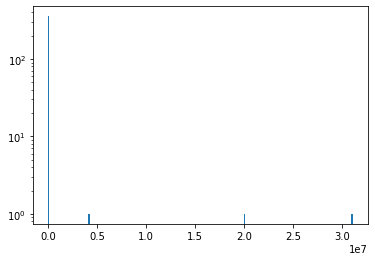

In [ ]:
plt.hist(sel_df['decay_srnn'], bins = 250)
# plt.xscale('log')
# plt.xlim(4e6,4.1e6 )
plt.yscale('log')
plt.show()

In [ ]:
sel_df

rise_lsst  decay_lsst  sf_lsst  ... rise_srnn  decay_srnn  sf_srnn
2         80.844     125.350    0.100  ...     0.258     417.212    0.063
32        14.300     107.849    0.101  ...     0.276     723.424    0.073
87         2.057      75.095    0.294  ...     0.076    1953.672    0.269
117        3.936      89.141    0.125  ...     0.052    1661.050    0.123
147       85.901     300.485    0.190  ...     0.413    3868.390    0.220
...          ...         ...      ...  ...       ...         ...      ...
11552      0.294     302.141    0.194  ...     0.036    3174.516    0.177
11577      4.021      13.488    0.108  ...     0.050     496.864    0.083
11607      1.962      52.511    0.065  ...     0.000     299.468    0.043
11637      0.039     267.538    0.263  ...     0.040    3081.514    0.217
11727      7.395      15.454    0.127  ...     0.026     351.601    0.078

[252 rows x 12 columns]

In [ ]:
df

rise_lsst  decay_lsst   sf_lsst  ... rise_srnn  decay_srnn   sf_srnn
0      0.517358  565.332084  0.062911  ...  0.350985  231.777020  0.049735
1     16.521021  647.425176  0.063290  ...  0.081521  224.847906  0.052577
2      2.731044  434.357780  0.062571  ...  0.580999  299.761669  0.051022
3      7.061715  606.024569  0.064073  ...  0.756458  287.572320  0.052587
4      3.627713  625.342077  0.057552  ...  0.553968  204.771641  0.046449
...         ...         ...       ...  ...       ...         ...       ...
1015  27.382619  149.645607  0.132718  ...       NaN         NaN  0.124654
1016   1.439591   57.962904  0.138948  ...       NaN         NaN  0.120917
1017  11.789399  162.373933  0.122016  ...  0.068389  382.534296  0.107107
1018   0.793757   60.477141  0.129932  ...  0.000817  332.186046  0.098763
1019  27.840630  160.474265  0.133531  ...  0.004141  400.589609  0.116790

[1020 rows x 12 columns]

In [ ]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

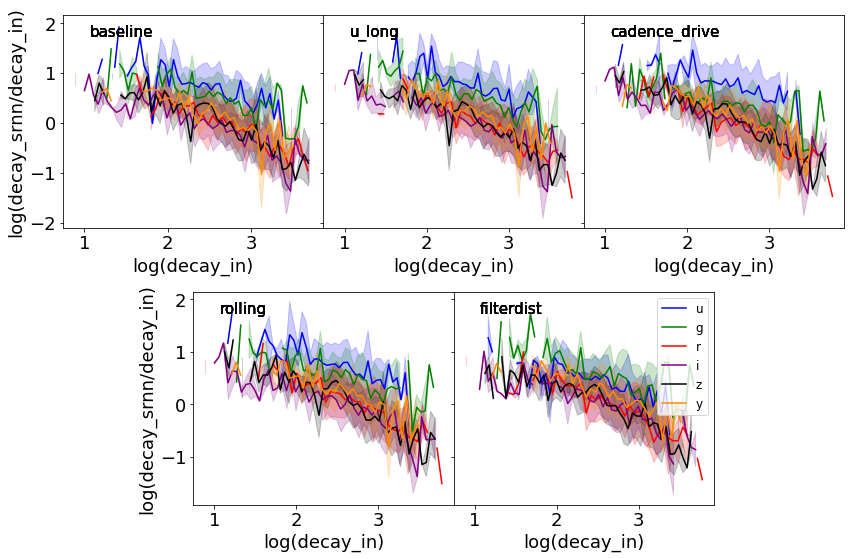

In [ ]:
from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny


band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]



n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()
    # ax.scatter(sel_df['decay_in'], sel_df['decay_srnn']/sel_df['decay_in'], label = band, s = 5, color = band_color[band])
    x = np.log10(sel_df['decay_in'].values).tolist()
    y = np.log10(sel_df['decay_srnn']/sel_df['decay_in'].values).tolist()
    x, y = remove_outlier(x, y)
    # sel_df = pd.DataFrame({'x':x, 'y':y}, columns=['x','y'])
 
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band)
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(decay_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_xlim(2, 4)
     
  

  n += 1

ax.legend(loc = 'upper right', fontsize = 12)

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(decay_srnn/decay_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

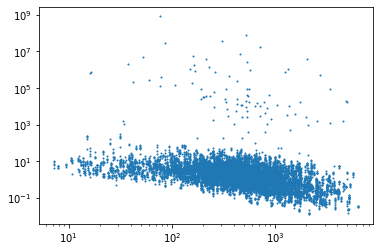

In [ ]:
plt.scatter(srnn_df['decay_in'], srnn_df['decay_srnn']/srnn_df['decay_in'], s = 1)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny


band_list = ['u',' g', 'r', 'i', 'z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]



n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['rise_in'])
    y = np.log10(sel_df['rise_srnn'])
    print(x, y)
    x, y = remove_outlier(x, y)
    # sel_df = pd.DataFrame({'x':x, 'y':y}, columns=['x','y'])
 
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band)
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(rise_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_xlim(0.5, 1.8)
     
  ax.legend(loc = 'lower right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(rise_srnn/rise_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

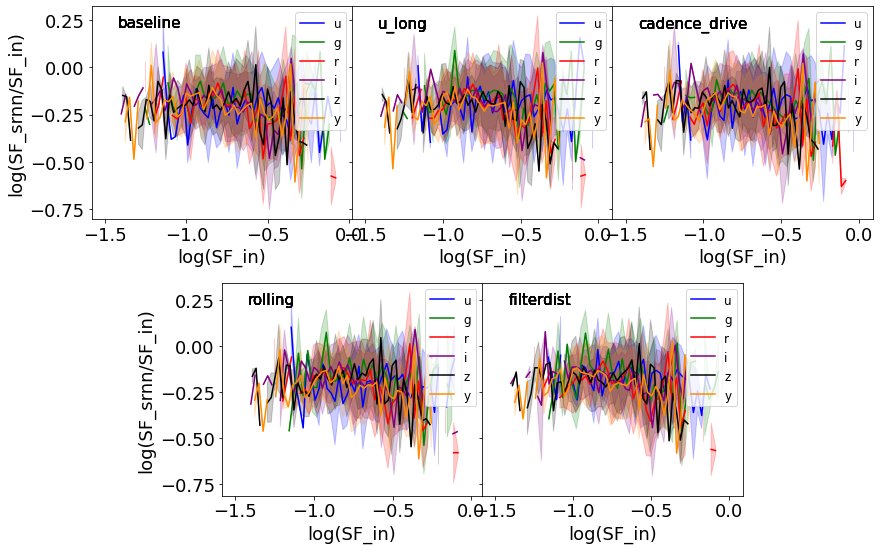

In [ ]:
from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny

band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]



n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['sf_in'].values).tolist()
    y = np.log10(sel_df['sf_srnn']/sel_df['sf_in'].values).tolist()
    x, y = remove_outlier(x, y)
 
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band)
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(SF_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_ylim(-1, 3)
     
  ax.legend(loc = 'upper right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(SF_srnn/SF_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

# DRW

In [ ]:
lsst_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/lsst_drw_all.csv')
srnn_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/srnn_drw_all.csv')

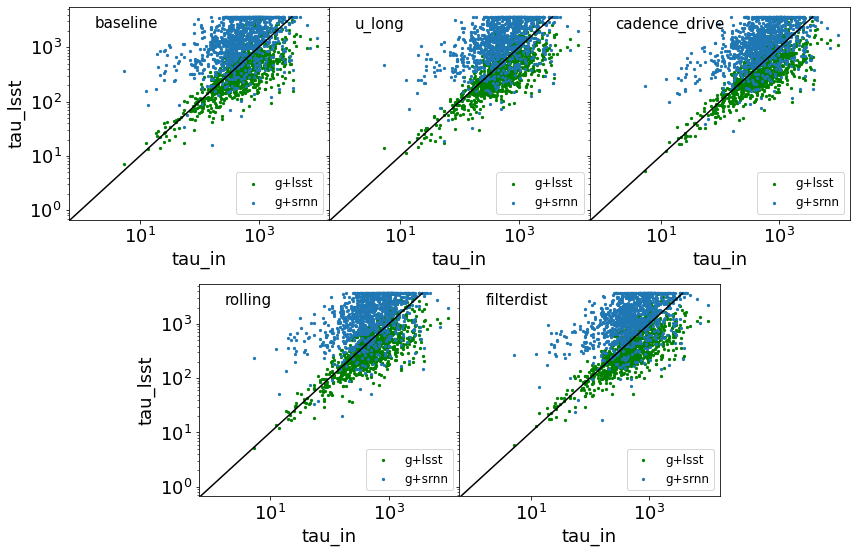

In [ ]:
from scipy import stats

def remove_outlier(data):
    q75,q25 = np.percentile(data,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    new_data = []
    for x in data:
      if x < min or x > max:
        new_data.append(np.nan)
      else:
        new_data.append(x)
    return new_data


band_list = ['g']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]

def f(x):
  return x

n = 0

for ax in ax_list:
  for band in band_list:
    sel_lsst_df = lsst_df[(lsst_df.cadence==cadence_list[n])&(lsst_df.band==band)]
    sel_srnn_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_lsst_df = sel_lsst_df.dropna()
    sel_srnn_df = sel_srnn_df.dropna()
    ax.scatter(sel_lsst_df['tau_in'], sel_lsst_df['tau_lsst'], label = band + '+lsst', s = 5, color = band_color[band])
    ax.scatter(sel_srnn_df['tau_in'], sel_srnn_df['tau_srnn'], label = band + '+srnn', s = 5)
    line_x = np.arange(0,3650)
    ax.plot(line_x, f(line_x), color = 'black')
    # x = np.log10(sel_df['tau_in']).tolist()
    # y = np.log10(sel_df['tau_lsst']).tolist()
    # y = remove_outlier(y)
    # sel_df = pd.DataFrame({'x':x, 'y':y}, columns=['x','y'])
 
    # smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    # standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    # bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    # ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band)
    # ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('tau_in', fontsize = 18)

    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_ylim(-1, 3)
     
  ax.legend(loc = 'lower right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('tau_lsst', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

# DRW with time dilation

In [ ]:
srnn_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/time dilation/srnn_drw_redshift_all.csv')
lsst_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/time dilation/lsst_drw_redshift_all.csv')
z_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/drw_3881.csv')

# remove time dilation effect
srnn_df_new = srnn_df.copy()
n = 0
while n < len(srnn_df):
  srnn_id = srnn_df['id'][n]
  z = z_df[z_df.SDR5ID == srnn_id]['redshift'].values[0]
  for i in np.arange(30):
    srnn_df_new.at[n+i,'tau_srnn'] = srnn_df['tau_srnn'][n+i]/(1+z)
  
  n += 30

srnn_df = srnn_df_new
lsst_df_new = lsst_df.copy()
n = 0
while n < len(srnn_df):
  lsst_id = lsst_df['id'][n]
  z = z_df[z_df.SDR5ID == lsst_id]['redshift'].values[0]
  for i in np.arange(30):
    lsst_df_new.at[n+i,'tau_lsst'] = lsst_df['tau_lsst'][n+i]/(1+z)

  n += 30
lsst_df = lsst_df_new
del lsst_df_new, srnn_df_new

In [ ]:
lsst_df

Unnamed: 0   sf_lsst    tau_lsst  ... redshift       id        cadence
0               0  0.204121  139.327774  ...   0.6125    190.0       baseline
1               1  0.185969  133.938530  ...   0.6125    190.0         u_long
2               2  0.185835  108.925106  ...   0.6125    190.0  cadence_drive
3               3  0.191082   96.494246  ...   0.6125    190.0        rolling
4               4  0.185912   93.276763  ...   0.6125    190.0     filterdist
...           ...       ...         ...  ...      ...      ...            ...
11995       11995  0.018912   92.116815  ...   2.0021  76485.0       baseline
11996       11996  0.019603   84.645183  ...   2.0021  76485.0         u_long
11997       11997  0.020018  109.436954  ...   2.0021  76485.0  cadence_drive
11998       11998  0.018567  117.157408  ...   2.0021  76485.0        rolling
11999       11999  0.018795   75.680624  ...   2.0021  76485.0     filterdist

[12000 rows x 9 columns]

In [ ]:
srnn_df

Unnamed: 0  Unnamed: 0.1   sf_srnn  ...     sf_in       id        cadence
0               0             0  0.149491  ...  0.364546    190.0       baseline
1               1             1  0.152669  ...  0.364546    190.0         u_long
2               2             2  0.154980  ...  0.364546    190.0  cadence_drive
3               3             3  0.151546  ...  0.364546    190.0        rolling
4               4             4  0.165630  ...  0.364546    190.0     filterdist
...           ...           ...       ...  ...       ...      ...            ...
11995        2395          2395  0.019042  ...  0.055275  76485.0       baseline
11996        2396          2396  0.018206  ...  0.055275  76485.0         u_long
11997        2397          2397  0.017192  ...  0.055275  76485.0  cadence_drive
11998        2398          2398  0.017182  ...  0.055275  76485.0        rolling
11999        2399          2399  0.017994  ...  0.055275  76485.0     filterdist

[12000 rows x 9 columns]

In [ ]:
lsst_df['id'] = lsst_df['id'].astype('int32')
lsst_df = lsst_df.round({'tau_lsst': 3, 'sf_lsst': 3, 'tau_in': 3,'sf_in':3})
lsst_df = lsst_df.drop('Unnamed: 0', axis = 1)
srnn_df['id'] = srnn_df['id'].astype('int32')
srnn_df = srnn_df.round({'tau_srnn': 3, 'sf_srnn': 3, 'tau_in': 3,'sf_in':3})
srnn_df = srnn_df.drop('Unnamed: 0', axis = 1).drop('Unnamed: 0.1', axis = 1)

In [ ]:
df_drw = pd.merge(lsst_df, srnn_df, on=["id", "band","cadence","tau_in","sf_in"])
df_drw.to_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/drw_all_redshift.csv')
df_drw

sf_lsst  tau_lsst band   tau_in  ...     id        cadence  sf_srnn  tau_srnn
0        0.204   139.328    u  298.772  ...    190       baseline    0.149  1000.614
1        0.186   133.939    u  298.772  ...    190         u_long    0.153  1279.047
2        0.186   108.925    u  298.772  ...    190  cadence_drive    0.155  1144.667
3        0.191    96.494    u  298.772  ...    190        rolling    0.152  1104.516
4        0.186    93.277    u  298.772  ...    190     filterdist    0.166   811.183
...        ...       ...  ...      ...  ...    ...            ...      ...       ...
11995    0.019    92.117    y  384.769  ...  76485       baseline    0.019    15.018
11996    0.020    84.645    y  384.769  ...  76485         u_long    0.018    14.007
11997    0.020   109.437    y  384.769  ...  76485  cadence_drive    0.017    12.427
11998    0.019   117.157    y  384.769  ...  76485        rolling    0.017    12.538
11999    0.019    75.681    y  384.769  ...  76485     filterdist    0.018    13.440

[12000 rows x 10 columns]

In [ ]:
band_list = ['u','g','r','i','z','y']
band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

drw_dist = {}
for band in band_list:
  drw_dist[band] = []
  for cadence in cadence_list:
    sel_df = df_drw[(df_drw.cadence==cadence)&(df_drw.band==band)].dropna()
    sel_df = sel_df[(sel_df.tau_srnn<1e4)&(sel_df.tau_lsst<1e4)]
    result = (abs(sel_df['tau_srnn'] - sel_df['tau_lsst'])/sel_df['tau_in']+
          abs(sel_df['sf_srnn'] - sel_df['sf_lsst'])/sel_df['sf_in']).mean()
    drw_dist[band].append(result)
    
drw_dist

{'g': [2.1011155771634353,
  2.1245297966182437,
  1.742720153317191,
  2.1663280412647,
  2.0905741645406524],
 'i': [1.4541862109839891,
  1.4933216749323097,
  1.5226108495404527,
  1.5255389321031925,
  1.5263891009739496],
 'r': [1.1558217019705739,
  1.1620381491870577,
  1.0846309788469557,
  1.2495387777543474,
  1.1205266010920019],
 'u': [3.4301927515538067,
  3.624284337985971,
  3.9019871426489976,
  3.6125420152809893,
  2.646531338017652],
 'y': [1.1837195198580377,
  1.2387758029568352,
  1.2165289615412227,
  1.2922363415259637,
  1.2341042991313227],
 'z': [1.783801998576347,
  1.793447577876191,
  1.802268898745803,
  1.783306458235516,
  1.7932254493563458]}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


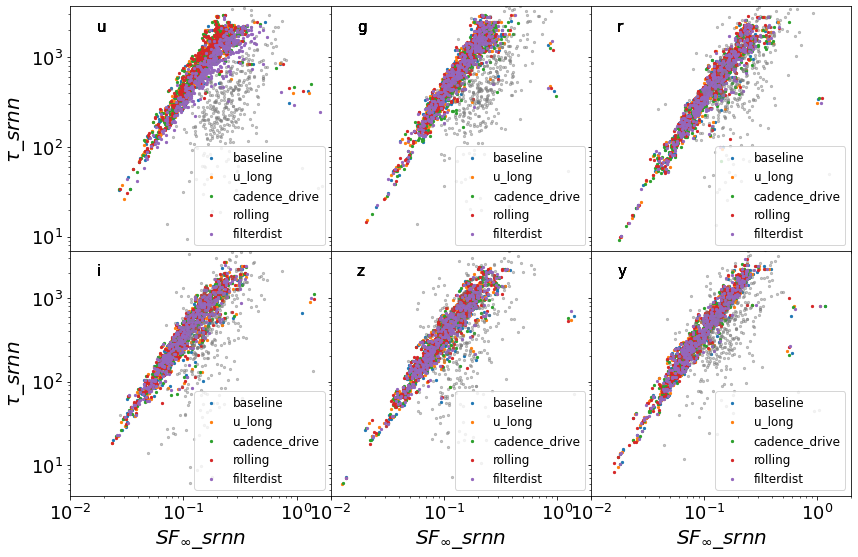

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14,9),sharex='col',sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
band_list = ['u','g','r','i','z','y']
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']
n = 0
for row in np.arange(2):
  for col in np.arange(3):
    ax = axs[row, col]
    for cad in cadence_list:
      sel_df = srnn_df[(srnn_df.cadence==cad)&(srnn_df.band==band_list[n])]
      ax.scatter(sel_df['sf_srnn'], sel_df['tau_srnn'], label = cad, s = 5)
      ax.scatter(sel_df['sf_in'], sel_df['tau_in'], color = 'grey', alpha = 0.1, s = 5)
      ax.text(0.1, 0.9, transform=ax.transAxes, s = band_list[n], fontsize = 15)
      ax.set_yscale('log') 
      ax.set_xscale('log') 
      ax.set_xlim([1e-2, 2])
      ax.set_ylim(0, 3650)
      ax.tick_params(axis="x", labelsize=18)
      ax.tick_params(axis="y", labelsize=18)
            
    ax.legend(loc = 'lower right', fontsize = 12)
    if row == 1:
      ax.set_xlabel(r'$SF_{\infty}\_srnn$', fontsize = 20)
    if col == 0:
      ax.set_ylabel(r'$\tau\_srnn$', fontsize = 20)
    n += 1
plt.show()

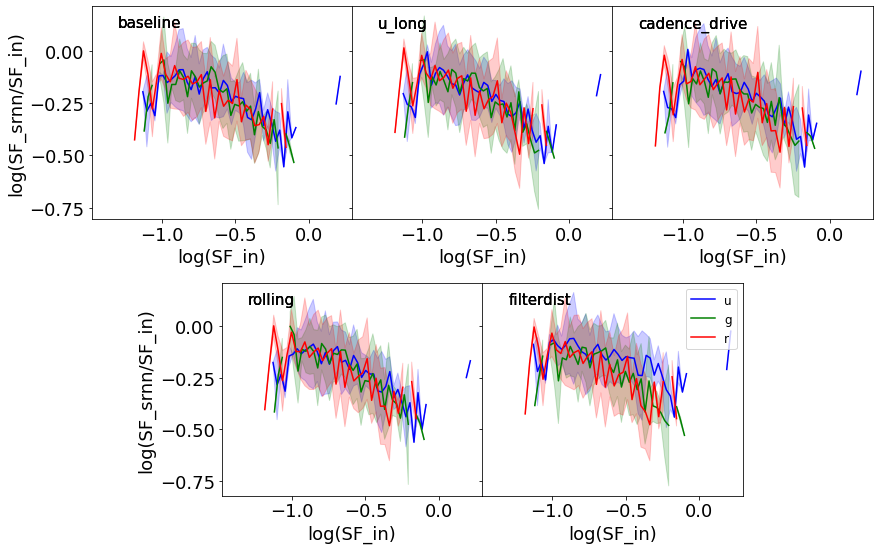

In [ ]:
from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny


band_list = ['u','g','r']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]

n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['sf_in'].values).tolist()
    # x = sel_df['sf_in'].values.tolist()
    y = np.log10(sel_df['sf_srnn']/sel_df['sf_in'].values).tolist()
    x, y = remove_outlier(x, y)
 
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band)
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(SF_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_ylim(-1, 3

  n += 1
ax.legend(loc = 'upper right', fontsize = 12)
for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(SF_srnn/SF_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

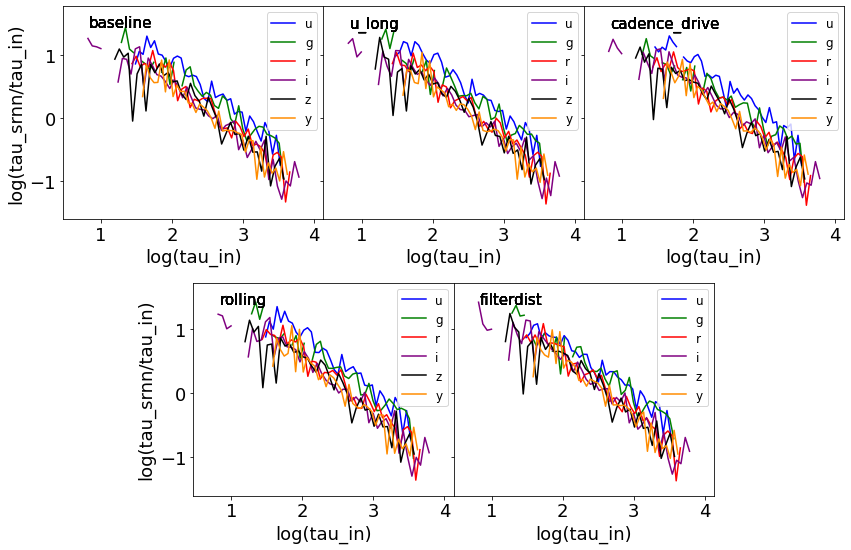

In [ ]:
from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny



band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]



n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()
    # ax.scatter(sel_df['decay_in'], sel_df['decay_srnn']/sel_df['decay_in'], label = band, s = 5, color = band_color[band])
    x = np.log10(sel_df['tau_in'].values).tolist()
    y = np.log10(sel_df['tau_srnn']/sel_df['tau_in'].values).tolist()
    x, y = remove_outlier(x, y)
    # sel_df = pd.DataFrame({'x':x, 'y':y}, columns=['x','y'])
 
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band)
    # ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(tau_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_ylim(-1, 3)
     
  ax.legend(loc = 'upper right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(tau_srnn/tau_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

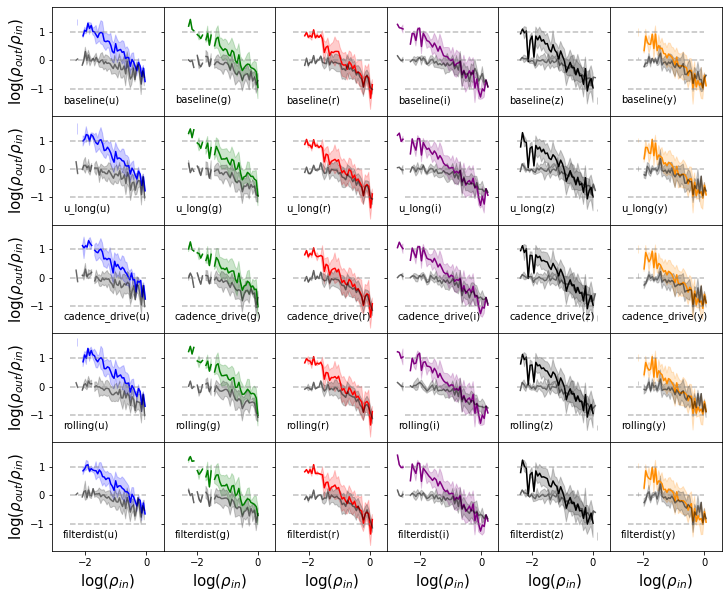

In [ ]:
# 5*6 subplots


from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny

def line(x):
  return [0]*len(x)

def line_1(x):
  return [1]*len(x)

def line_n1(x):
  return [-1]*len(x)
 

band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig, ax = plt.subplots(5, 6, figsize = (12, 10), sharey=True, sharex = True, gridspec_kw={'hspace': 0, 'wspace': 0})

for m in np.arange(5):
  for n in np.arange(6):
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[m])&(srnn_df.band==band_list[n])]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['tau_in'].values/3650).tolist()
    y = np.log10(sel_df['tau_srnn']/sel_df['tau_in'].values).tolist()
    x, y = remove_outlier(x, y)
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax[m, n].plot(bin_centres,smooth_data[0], color = band_color[band_list[n]])
    ax[m, n].fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band_list[n]])
    

    sel_df = lsst_df[(lsst_df.cadence==cadence_list[m])&(lsst_df.band==band_list[n])]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['tau_in'].values/3650).tolist()
    y = np.log10(sel_df['tau_lsst']/sel_df['tau_in'].values).tolist()
    x, y = remove_outlier(x, y)
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax[m, n].plot(bin_centres,smooth_data[0], color = 'black', alpha = 0.5)
    ax[m, n].fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = 'black')

    line_x = np.linspace(-2.5, 0, num=10)
    ax[m, n].plot(line_x, line(line_x), '--', color = 'grey', alpha = 0.5)
    ax[m, n].plot(line_x, line_1(line_x), '--', color = 'grey', alpha = 0.5)
    ax[m, n].plot(line_x, line_n1(line_x), '--', color = 'grey', alpha = 0.5)


    ax[m, n].text(0.1, 0.1, transform=ax[m, n].transAxes, horizontalalignment='left', verticalalignment='bottom', s = cadence_list[m] + '('+band_list[n]+')', fontsize = 10)
    if m == 4:
      ax[m, n].set_xlabel(r'log($\rho_{in}$)', fontsize = 15)
    if n == 0:
      ax[m, n].set_ylabel(r'log($\rho _{out}/\rho _{in}$)', fontsize = 15)


plt.show()


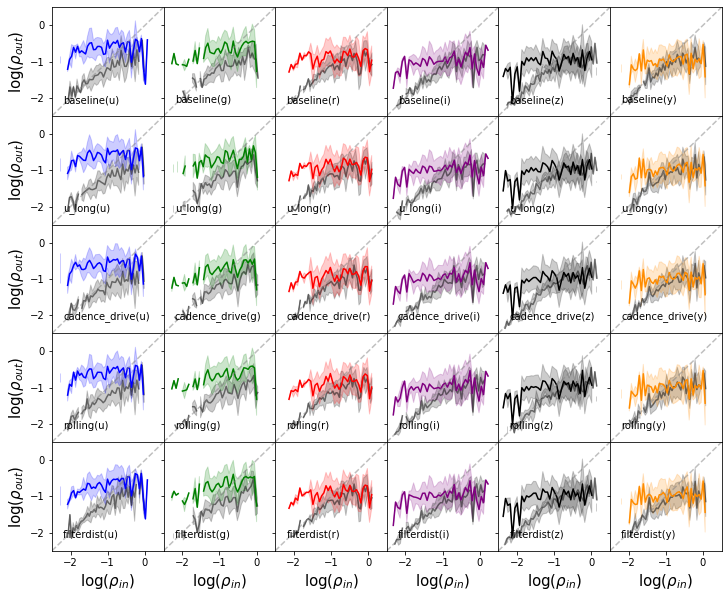

In [ ]:
# 5*6 subplots


from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny

def line(x):
  return [0]*len(x)

def line_1(x):
  return [1]*len(x)

def line_n1(x):
  return [-1]*len(x)
 

band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig, ax = plt.subplots(5, 6, figsize = (12, 10), sharey=True, sharex = True, gridspec_kw={'hspace': 0, 'wspace': 0})

for m in np.arange(5):
  for n in np.arange(6):
    sel_df = lsst_df[(lsst_df.cadence==cadence_list[m])&(lsst_df.band==band_list[n])]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['tau_in'].values/3650).tolist()
    y = np.log10(sel_df['tau_lsst'].values/3650).tolist()
    x, y = remove_outlier(x, y)
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax[m, n].plot(bin_centres,smooth_data[0], color = 'black', alpha = 0.5)
    ax[m, n].fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = 'black')

    sel_df = srnn_df[(srnn_df.cadence==cadence_list[m])&(srnn_df.band==band_list[n])]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['tau_in'].values/3650).tolist()
    y = np.log10(sel_df['tau_srnn'].values/3650).tolist()
    x, y = remove_outlier(x, y)
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax[m, n].plot(bin_centres,smooth_data[0], color = band_color[band_list[n]])
    ax[m, n].fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band_list[n]])
    



    # line_x = np.linspace(-2.5, 0, num=10)
    # ax[m, n].plot(line_x, line(line_x), '--', color = 'grey', alpha = 0.5)
    # ax[m, n].plot(line_x, line_1(line_x), '--', color = 'grey', alpha = 0.5)
    # ax[m, n].plot(line_x, line_n1(line_x), '--', color = 'grey', alpha = 0.5)
    line_x = np.linspace(-2.5, 0.5, num=10)
    ax[m, n].plot(line_x, line_x, '--', color = 'grey', alpha = 0.5)
    ax[m, n].set_xlim(-2.5, 0.5)
    ax[m, n].set_ylim(-2.5, 0.5)

    ax[m, n].text(0.1, 0.1, transform=ax[m, n].transAxes, horizontalalignment='left', verticalalignment='bottom', s = cadence_list[m] + '('+band_list[n]+')', fontsize = 10)
    if m == 4:
      ax[m, n].set_xlabel(r'log($\rho_{in}$)', fontsize = 15)
    if n == 0:
      ax[m, n].set_ylabel(r'log($\rho _{out}$)', fontsize = 15)


plt.show()


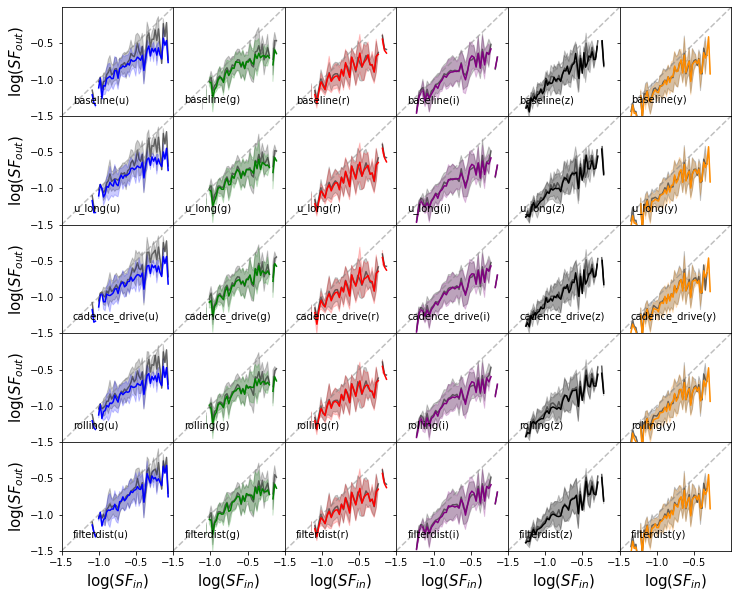

In [ ]:
# 5*6 subplots


from scipy import stats

def remove_outlier(x, y):
    q75,q25 = np.percentile(y,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    nx, ny = [], []
    for _x, _y in zip(x, y):
      if _y >= min and _y <= max:
        nx.append(_x)
        ny.append(_y)
    return nx, ny

def line(x):
  return [0]*len(x)

def line_1(x):
  return [1]*len(x)

def line_n1(x):
  return [-1]*len(x)
 

band_list = ['u','g','r','i','z','y']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig, ax = plt.subplots(5, 6, figsize = (12, 10), sharey=True, sharex = True, gridspec_kw={'hspace': 0, 'wspace': 0})

for m in np.arange(5):
  for n in np.arange(6):

    sel_df = lsst_df[(lsst_df.cadence==cadence_list[m])&(lsst_df.band==band_list[n])]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['sf_in'].values).tolist()
    y = np.log10(sel_df['sf_lsst'].values).tolist()
    x, y = remove_outlier(x, y)
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax[m, n].plot(bin_centres,smooth_data[0], color = 'black', alpha = 0.5)
    ax[m, n].fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = 'black')


    sel_df = srnn_df[(srnn_df.cadence==cadence_list[m])&(srnn_df.band==band_list[n])]
    sel_df = sel_df.dropna()
    x = np.log10(sel_df['sf_in'].values).tolist()
    y = np.log10(sel_df['sf_srnn'].values).tolist()
    x, y = remove_outlier(x, y)
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax[m, n].plot(bin_centres,smooth_data[0], color = band_color[band_list[n]])
    ax[m, n].fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band_list[n]])
    ax[m, n].text(0.1, 0.1, transform=ax[m, n].transAxes, horizontalalignment='left', verticalalignment='bottom', s = cadence_list[m] + '('+band_list[n]+')', fontsize = 10)

    ax[m, n].set_xticks([-1.5, -1, -0.5])
    ax[m, n].set_yticks([-1.5, -1, -0.5])
    ax[m, n].set_xlim(-1.5, 0)
    ax[m, n].set_ylim(-1.5, 0)

    line_x = np.linspace(-1.5, 0, num=10)
    ax[m, n].plot(line_x, line_x, '--', color = 'grey', alpha = 0.5)

    if m == 4:
      ax[m, n].set_xlabel(r'log($SF_{in}$)', fontsize = 15)
    if n == 0:
      ax[m, n].set_ylabel(r'log($SF_{out}$)', fontsize = 15)


plt.show()


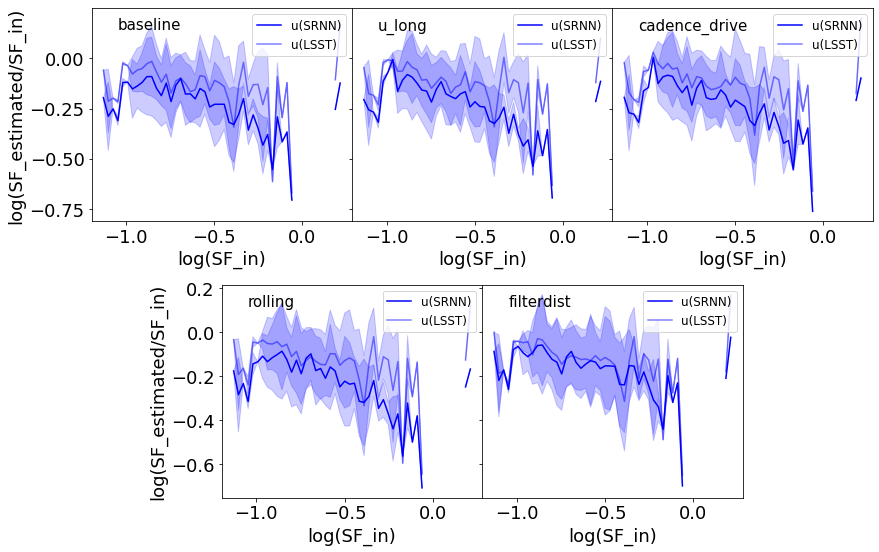

In [ ]:
from scipy import stats

def remove_outlier(data):
    q75,q25 = np.percentile(data,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    new_data = []
    for x in data:
      if x < min or x > max:
        new_data.append(np.nan)
      else:
        new_data.append(x)
    return new_data


band_list = ['u']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]

n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()
    sel_lsst_df = lsst_df[(lsst_df.cadence==cadence_list[n])&(lsst_df.band==band)]
    sel_lsst_df = sel_lsst_df.dropna()

    x = np.log10(sel_df['sf_in'].values).tolist()
    y = np.log10(sel_df['sf_srnn']/sel_df['sf_in'].values).tolist()
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band + '(SRNN)')
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])

    x = np.log10(sel_lsst_df['sf_in'].values).tolist()
    y = np.log10(sel_lsst_df['sf_lsst']/sel_lsst_df['sf_in'].values).tolist()
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], alpha = 0.5, label = band + '(LSST)')
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(SF_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_ylim(-1, 3)
     
  ax.legend(loc = 'upper right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(SF_estimated/SF_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

In [ ]:
lsst_df_rest = pd.read_csv('/content/drive/MyDrive/lsst_drw_all.csv')
srnn_df_rest = pd.read_csv('/content/drive/MyDrive/srnn_drw_all.csv')

max_count = 400
# obj_list = list(set(lsst_df_rest['id'].values))[:400]
obj_list = list(set(lsst_df['id'].values))
lsst_df_rest = lsst_df_rest[lsst_df_rest.id.isin(obj_list)]
srnn_df_rest = srnn_df_rest[srnn_df_rest.id.isin(obj_list)]

In [ ]:
lsst_df_rest

Unnamed: 0   sf_lsst    tau_lsst  ...     sf_in       id        cadence
0               0  0.296671  255.822439  ...  0.364546    190.0       baseline
1               1  0.254521  275.336875  ...  0.364546    190.0         u_long
2               2  0.231589  162.681762  ...  0.364546    190.0  cadence_drive
3               3  0.245664  206.689974  ...  0.364546    190.0        rolling
4               4  0.343448  296.028948  ...  0.364546    190.0     filterdist
...           ...       ...         ...  ...       ...      ...            ...
11995       11995  0.036170  250.863785  ...  0.055275  76485.0       baseline
11996       11996  0.033653  273.608863  ...  0.055275  76485.0         u_long
11997       11997  0.031532  182.903977  ...  0.055275  76485.0  cadence_drive
11998       11998  0.033544  221.745972  ...  0.055275  76485.0        rolling
11999       11999  0.033991  217.746649  ...  0.055275  76485.0     filterdist

[12000 rows x 8 columns]

In [ ]:
srnn_df_rest

Unnamed: 0  Unnamed: 0.1   sf_srnn  ...     sf_in       id        cadence
0               0             0  0.225037  ...  0.364546    190.0       baseline
1               1             1  0.193772  ...  0.364546    190.0         u_long
2               2             2  0.171423  ...  0.364546    190.0  cadence_drive
3               3             3  0.193145  ...  0.364546    190.0        rolling
4               4             4  0.318628  ...  0.364546    190.0     filterdist
...           ...           ...       ...  ...       ...      ...            ...
11995        1495          1495  0.023108  ...  0.055275  76485.0       baseline
11996        1496          1496  0.021732  ...  0.055275  76485.0         u_long
11997        1497          1497  0.018161  ...  0.055275  76485.0  cadence_drive
11998        1498          1498  0.016439  ...  0.055275  76485.0        rolling
11999        1499          1499  0.021508  ...  0.055275  76485.0     filterdist

[12000 rows x 9 columns]

In [ ]:
srnn_df

Unnamed: 0  Unnamed: 0.1   sf_srnn  ...     sf_in       id        cadence
0               0             0  0.149491  ...  0.364546    190.0       baseline
1               1             1  0.152669  ...  0.364546    190.0         u_long
2               2             2  0.154980  ...  0.364546    190.0  cadence_drive
3               3             3  0.151546  ...  0.364546    190.0        rolling
4               4             4  0.165630  ...  0.364546    190.0     filterdist
...           ...           ...       ...  ...       ...      ...            ...
11995        2395          2395  0.019042  ...  0.055275  76485.0       baseline
11996        2396          2396  0.018206  ...  0.055275  76485.0         u_long
11997        2397          2397  0.017192  ...  0.055275  76485.0  cadence_drive
11998        2398          2398  0.017182  ...  0.055275  76485.0        rolling
11999        2399          2399  0.017994  ...  0.055275  76485.0     filterdist

[12000 rows x 9 columns]

In [ ]:
lsst_df

Unnamed: 0   sf_lsst    tau_lsst  ... redshift       id        cadence
0               0  0.204121  224.666036  ...   0.6125    190.0       baseline
1               1  0.185969  215.975880  ...   0.6125    190.0         u_long
2               2  0.185835  175.641734  ...   0.6125    190.0  cadence_drive
3               3  0.191082  155.596972  ...   0.6125    190.0        rolling
4               4  0.185912  150.408781  ...   0.6125    190.0     filterdist
...           ...       ...         ...  ...      ...      ...            ...
11995       11995  0.018912  276.543891  ...   2.0021  76485.0       baseline
11996       11996  0.019603  254.113302  ...   2.0021  76485.0         u_long
11997       11997  0.020018  328.540680  ...   2.0021  76485.0  cadence_drive
11998       11998  0.018567  351.718255  ...   2.0021  76485.0        rolling
11999       11999  0.018795  227.200802  ...   2.0021  76485.0     filterdist

[12000 rows x 9 columns]

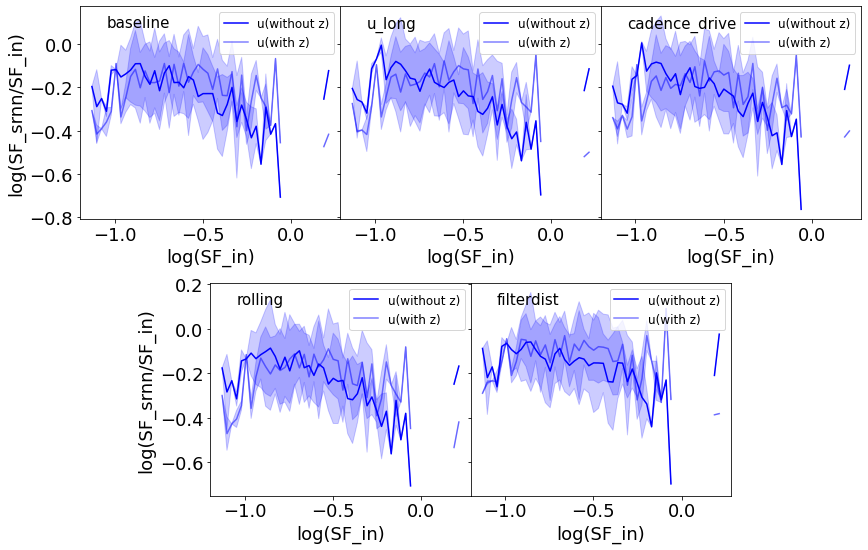

In [ ]:
from scipy import stats

def remove_outlier(data):
    q75,q25 = np.percentile(data,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    new_data = []
    for x in data:
      if x < min or x > max:
        new_data.append(np.nan)
      else:
        new_data.append(x)
    return new_data


band_list = ['u']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]

n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    # sel_df = sel_df.dropna()
    

    sel_srnn_df_rest = srnn_df_rest[(srnn_df_rest.cadence==cadence_list[n])&(srnn_df_rest.band==band)]
    # sel_srnn_df_rest = srnn_df_rest.dropna()

    x = np.log10(sel_df['sf_in'].values).tolist()
    y = np.log10(sel_df['sf_srnn']/sel_df['sf_in'].values).tolist()
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band + '(without z)')
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])

    x = np.log10(sel_srnn_df_rest['sf_in'].values).tolist()
    y = np.log10(sel_srnn_df_rest['sf_srnn']/sel_srnn_df_rest['sf_in'].values).tolist()
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], alpha = 0.5, label = band + '(with z)')
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(SF_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_ylim(-1, 3)
     
  ax.legend(loc = 'upper right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(SF_srnn/SF_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

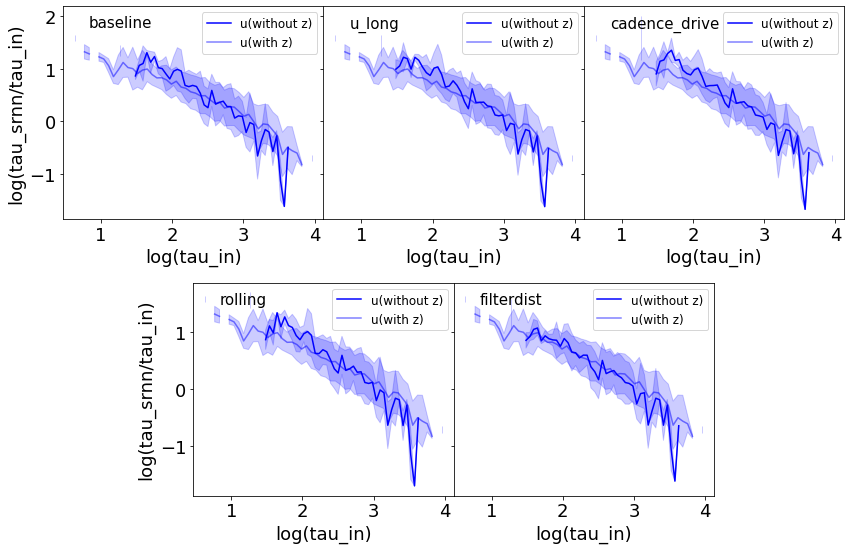

In [ ]:
from scipy import stats

def remove_outlier(data):
    q75,q25 = np.percentile(data,[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    new_data = []
    for x in data:
      if x < min or x > max:
        new_data.append(np.nan)
      else:
        new_data.append(x)
    return new_data


band_list = ['u']

band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']

fig = plt.figure(figsize=(14,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, sharey=ax1)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, sharey=ax1)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, sharey=ax4)

ax_list = [ax1, ax2, ax3, ax4, ax5]

n = 0

for ax in ax_list:
  for band in band_list:
    sel_df = srnn_df[(srnn_df.cadence==cadence_list[n])&(srnn_df.band==band)]
    sel_df = sel_df.dropna()
    

    sel_srnn_df_rest = srnn_df_rest[(srnn_df_rest.cadence==cadence_list[n])&(srnn_df_rest.band==band)]
    sel_srnn_df_rest = srnn_df_rest.dropna()

    x = np.log10(sel_df['tau_in'].values).tolist()
    y = np.log10(sel_df['tau_srnn']/sel_df['tau_in'].values).tolist()
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], label = band + '(without z)')
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])

    x = np.log10(sel_srnn_df_rest['tau_in'].values).tolist()
    y = np.log10(sel_srnn_df_rest['tau_srnn']/sel_srnn_df_rest['tau_in'].values).tolist()
    smooth_data = stats.binned_statistic(x,y,'median', bins=50)
    standard_deviation = stats.binned_statistic(x,y,'std', bins=50)
    bin_centres = 0.5*(smooth_data[1][1:] + smooth_data[1][:-1])
    ax.plot(bin_centres,smooth_data[0], color = band_color[band], alpha = 0.5, label = band + '(with z)')
    ax.fill_between(bin_centres, smooth_data[0]-standard_deviation[0], smooth_data[0]+standard_deviation[0], alpha=0.2, color = band_color[band])
    # ax.set_ylim(0,3)
    # ax.set_xscale('log')

    ax.text(0.1, 0.9, transform=ax.transAxes, s = cadence_list[n], fontsize = 15)
    ax.set_xlabel('log(tau_in)', fontsize = 18)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    # ax.set_yticks([-2, 0, 2])
    # ax.set_ylim(-1, 3)
     
  ax.legend(loc = 'upper right', fontsize = 12)

  n += 1

for ax in [ax2, ax3, ax5]:
  plt.setp(ax.get_yticklabels(), visible=False)
for ax in [ax1, ax4]:
  ax.set_ylabel('log(tau_srnn/tau_in)', fontsize = 18)

fig.subplots_adjust(wspace = 0, hspace=0.3) 
plt.show()

In [ ]:

# setup
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# add RNN-related API
from tensorflow.keras.layers import (Input, Dense, TimeDistributed, LSTM, GRU, Dropout, concatenate, Lambda, Masking, Embedding,
                          Flatten, RepeatVector, Bidirectional)
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras import backend as K
# from keras import objectives
from keras import losses
# from keras.objectives import binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the TensorBoard notebook extension
%load_ext tensorboard

import datetime
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
generative_full = tf.keras.models.load_model('/content/drive/MyDrive/model_params/generative_model_1012_drw_full')
generative_g30 = tf.keras.models.load_model('/content/drive/MyDrive/model_params/generative_model_1012_drw_s30g30')
generative_g60 = tf.keras.models.load_model('/content/drive/MyDrive/model_params/generative_model_1012_drw_s30g60')
generative_g120 = tf.keras.models.load_model('/content/drive/MyDrive/model_params/generative_model_1012_drw_s30g120')



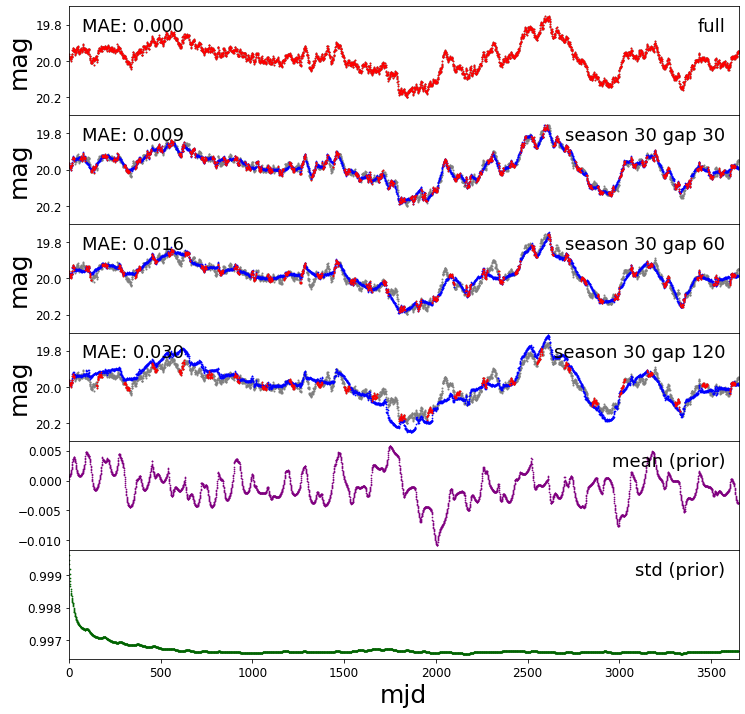

In [ ]:
# caculate the cadenced-light curve directly
import eztao
from eztao.carma import DRW_term,DHO_term, CARMA_term
from eztao.ts import gpSimRand
from eztao.ts import drw_fit
from eztao.ts import gpSimFull, gpSimByTime
from eztao.ts.carma_fit import sample_carma


def MAE(x, y):
  return np.mean(abs(x-y))

def season_cadence(t, y, yerr, season_len = 60, gap_len = 30):
  nt, ny, nyerr = [], [], []
  ot, oy, oyerr = [], [], []
  
  itr = int((t[-1] - t[0])/(season_len + gap_len))
  n = 0
  m = 0
  while m < itr:
    nt.extend(t[n:(n+season_len)])
    nt.extend([0]*gap_len)
    ny.extend(y[n:(n+season_len)])
    ny.extend([0]*gap_len)
    nyerr.extend(yerr[n:(n+season_len)])
    nyerr.extend([0]*gap_len)

    ot.extend(t[n:(n+season_len)])
    ot.extend([np.nan]*gap_len)
    oy.extend(y[n:(n+season_len)])
    oy.extend([np.nan]*gap_len)
    oyerr.extend(yerr[n:(n+season_len)])
    oyerr.extend([np.nan]*gap_len)

    n += (season_len + gap_len)
    m += 1

  if len(t) - n <= season_len:
    nt.extend(t[n:])
    ny.extend(y[n:])
    nyerr.extend(yerr[n:])
    ot.extend(t[n:])
    oy.extend(y[n:])
    oyerr.extend(yerr[n:])
  else:
    nt.extend(t[n:(n+season_len)])
    ny.extend(y[n:(n+season_len)])
    nyerr.extend(yerr[n:(n+season_len)])
    ot.extend(t[n:(n+season_len)])
    oy.extend(y[n:(n+season_len)])
    oyerr.extend(yerr[n:(n+season_len)])
    n += season_len
    nt.extend([0]*(len(t) - n))
    ny.extend([0]*(len(t) - n))
    nyerr.extend([0]*(len(t) - n))
    ot.extend([np.nan]*(len(t) - n))
    oy.extend([np.nan]*(len(t) - n))
    oyerr.extend([np.nan]*(len(t) - n))
  return np.array(nt), np.array(ny), np.array(nyerr), np.array(ot), np.array(oy), np.array(oyerr)

tau = 307
sf = 0.1
mu = 20

duration = 365*10
npts = 365*10 
SNR = 10

kernel = DRW_term(np.log(sf), np.log(tau))
t, y, yerr = gpSimFull(kernel, SNR, duration, npts, log_flux=True)
t3, y3, yerr3, ot3, oy3, oyerr3 = season_cadence(t, y, yerr, season_len = 30, gap_len = 30)
t6, y6, yerr6, ot6, oy6, oyerr6 = season_cadence(t, y, yerr, season_len = 30, gap_len = 60)
t12, y12, yerr12, ot12, oy12, oyerr12 = season_cadence(t, y, yerr, season_len = 30, gap_len = 120)

oy3 += mu
oy6 += mu
oy12 += mu

input_color = 'blue'
srnn_color = 'red'
real_color = 'grey'
text_size = 18
scatter_size = 0.5

# 0.1, 0.1, transform=ax[m, n].transAxes, horizontalalignment='left', verticalalignment='bottom', s = cadence_list[m] + '('+band_list[n]+')', fontsize = 10

predict_full = y.reshape(1, 3650, 1)
prior_full, prior_z_mean, prior_z_log_sigma, d1_out = generative_full.predict(predict_full)
lc_full = predict_full[0].reshape(3650, )
fig, ax = plt.subplots(6, 1, figsize = (12, 12), sharex = True, gridspec_kw={'hspace': 0})

for i in np.arange(4):
  ax[i].scatter(t, y + mu, color = real_color, s = 1)
  ax[i].set_ylabel('mag', fontsize = 25)
  ax[i].invert_yaxis()
  ax[i].set_ylim(20.3,19.7)
  ax[i].set_xlim(0, 3650)
  ax[i].set_yticks([20.2, 20, 19.8])
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)



ax[0].scatter(t, lc_full + mu, color = srnn_color,s = scatter_size)
ax[0].text(0.98, 0.9, transform=ax[0].transAxes, horizontalalignment='right', verticalalignment='top', s = 'full', fontsize = text_size)
ax[0].text(0.02, 0.9, transform=ax[0].transAxes, horizontalalignment='left', verticalalignment='top', s = 'MAE: %.3f'% MAE(y, lc_full), fontsize = text_size)

predict_g30 = y3.reshape(1, 3650, 1)
prior_g30, prior_z_mean, prior_z_log_sigma, d1_out = generative_g30.predict(predict_g30)
lc_g30 = prior_g30[0].reshape(3650, )
ax[1].scatter(np.arange(len(t)), lc_g30 + mu, color = input_color , s = scatter_size)
ax[1].scatter(ot3, oy3, color = srnn_color, s = scatter_size)
ax[1].text(0.98, 0.9, transform=ax[1].transAxes, horizontalalignment='right', verticalalignment='top', s = 'season 30 gap 30', fontsize = text_size)
ax[1].text(0.02, 0.9, transform=ax[1].transAxes, horizontalalignment='left', verticalalignment='top', s = 'MAE: %.3f'% MAE(y, lc_g30), fontsize = text_size)

predict_g60 = y6.reshape(1, 3650, 1)
prior_g60, prior_z_mean, prior_z_log_sigma, d1_out = generative_g60.predict(predict_g60)
lc_g60 = prior_g60[0].reshape(3650, )
ax[2].scatter(np.arange(len(t)), lc_g60 + mu, color = input_color , s = scatter_size)
ax[2].scatter(ot6, oy6, color = srnn_color, s = scatter_size)
ax[2].text(0.98, 0.9, transform=ax[2].transAxes, horizontalalignment='right', verticalalignment='top', s = 'season 30 gap 60', fontsize = text_size)
ax[2].text(0.02, 0.9, transform=ax[2].transAxes, horizontalalignment='left', verticalalignment='top', s = 'MAE: %.3f'% MAE(y, lc_g60), fontsize = text_size)


predict_g120 = y6.reshape(1, 3650, 1)
prior_g120, prior_z_mean, prior_z_log_sigma, d1_out = generative_g120.predict(predict_g120)
lc_g120 = prior_g120[0].reshape(3650, )
ax[3].scatter(np.arange(len(t)), lc_g120 + mu, color = input_color , s = scatter_size)
ax[3].scatter(ot12, oy12, color = srnn_color,s = scatter_size)

ax[3].text(0.98, 0.9, transform=ax[3].transAxes, horizontalalignment='right', verticalalignment='top', s = 'season 30 gap 120', fontsize = text_size)
ax[3].text(0.02, 0.9, transform=ax[3].transAxes, horizontalalignment='left', verticalalignment='top', s = 'MAE: %.3f'% MAE(y, lc_g120), fontsize = text_size)

# plot prior_mean and prior_var for s30 g120


pri_mean = prior_z_mean[0][:,1]
ax[4].scatter(np.arange(len(pri_mean)), pri_mean, c = 'purple',s = scatter_size)
# ax[4].set_ylabel('mag', fontsize = 25)
ax[4].xaxis.set_tick_params(labelsize=12)
ax[4].yaxis.set_tick_params(labelsize=12)
ax[4].text(0.98, 0.9, transform=ax[4].transAxes, horizontalalignment='right', verticalalignment='top', s = 'mean (prior)', fontsize = text_size)


pri_var = prior_z_log_sigma[0][:,1]
ax[5].scatter(np.arange(len(pri_var)), np.sqrt(np.exp(pri_var)), c = 'darkgreen',s = scatter_size)
# ax[5].set_ylabel('std', fontsize = 25)
ax[5].xaxis.set_tick_params(labelsize=12)
ax[5].yaxis.set_tick_params(labelsize=12)
ax[5].set_xlabel('mjd', fontsize = 25)
ax[5].text(0.98, 0.9, transform=ax[5].transAxes, horizontalalignment='right', verticalalignment='top', s = 'std (prior)', fontsize = text_size)


plt.show()

In [ ]:
prior_z_mean[0].shape

(3650, 64)

In [ ]:
generative_full.summary()

Model: "generative_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_input (InputLayer)            [(None, 3650, 2)]    0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 3650, 64)     6912        X_input[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 3650, 64)     18816       bidirectional[0][0]              
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 3650, 64)     18816       bidirectional_1[0][0]            
___________________________________________________________________________________

# Metric Plotting

In [ ]:
df_under = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/under_all_redshift.csv')

In [ ]:
df_over = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/over_all_redshift.csv')

In [ ]:
df_drw = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/SRNN_dataset/srnnGPR_sets/drw_all_redshift.csv')

In [ ]:
band_list = ['u','g','r','i','z','y']
band_color = {'u':'blue', 'g':'green','r':'red', 'i':'purple', 'z':'black','y':'darkorange'}
cadence_list = ['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']



In [ ]:
drw_dist = {}
for band in band_list:
  drw_dist[band] = []
  for cadence in cadence_list:
    sel_df = df_drw[(df_drw.cadence==cadence)&(df_drw.band==band)].dropna()
    sel_df = sel_df[(sel_df.tau_srnn<1e4)&(sel_df.tau_lsst<1e4)]
    result = (abs(sel_df['tau_srnn'] - sel_df['tau_lsst'])/sel_df['tau_in']+
          abs(sel_df['sf_srnn'] - sel_df['sf_lsst'])/sel_df['sf_in']).mean()
    drw_dist[band].append(result)
    
drw_dist

{'g': [2.1011155771634353,
  2.1245297966182437,
  1.7427201533171908,
  2.1663280412647,
  2.090574164540652],
 'i': [1.4541862109839891,
  1.4933216749323097,
  1.5226108495404527,
  1.5255389321031925,
  1.5263891009739496],
 'r': [1.1558217019705739,
  1.162038149187058,
  1.084630978846956,
  1.2495387777543474,
  1.1205266010920019],
 'u': [3.4301927515538067,
  3.624284337985971,
  3.901987142648998,
  3.6125420152809893,
  2.646531338017652],
 'y': [1.1837195198580377,
  1.2387758029568352,
  1.2165289615412227,
  1.2922363415259637,
  1.234104299131323],
 'z': [1.7838019985763471,
  1.793447577876191,
  1.8022688987458029,
  1.7833064582355163,
  1.7932254493563458]}

In [ ]:
over_dist = {}
for band in band_list:
  over_dist[band] = []
  for cadence in cadence_list:
    sel_df = df_over[(df_over.cadence==cadence)&(df_over.band==band)].dropna()
    sel_df = sel_df[(sel_df.decay_srnn<1e4)&(sel_df.decay_lsst<1e4)]
    result = (abs(sel_df['decay_srnn'] - sel_df['decay_lsst'])/sel_df['decay_in']+
          abs(sel_df['rise_srnn'] - sel_df['rise_lsst'])/sel_df['rise_in']+
          abs(sel_df['sf_srnn'] - sel_df['sf_lsst'])/sel_df['sf_in']).mean()
    over_dist[band].append(result)
    
over_dist

{'g': [4.696930838069048,
  5.269507651938599,
  3.282122755730584,
  5.235455461748832,
  5.247219956771175],
 'i': [2.6080186494482254,
  2.1657623863651936,
  2.4236212887348443,
  2.3338345146380552,
  2.381654693156817],
 'r': [2.226333478360048,
  2.306995053028615,
  2.3652747230974156,
  2.431258302914042,
  2.589272425354],
 'u': [9.546129769643535,
  9.178954175461032,
  10.342267343705297,
  8.964707602043305,
  4.541387256320311],
 'y': [2.9517661181923804,
  3.36398439553594,
  2.576925035015835,
  3.1798862658004805,
  3.3881061185062173],
 'z': [2.7574295292571325,
  2.592488103105932,
  2.737143274389936,
  3.1799843039251385,
  2.622592537915148]}

In [ ]:
under_dist = {}
for band in band_list:
  under_dist[band] = []
  for cadence in cadence_list:
    sel_df = df_under[(df_under.cadence==cadence)&(df_under.band==band)].dropna()
    sel_df = sel_df[(sel_df.decay_srnn<1e4)&(sel_df.decay_lsst<1e4)]
    result = (abs(sel_df['decay_srnn'] - sel_df['decay_lsst'])/sel_df['decay_in']+
          abs(sel_df['qpo_srnn'] - sel_df['qpo_lsst'])/sel_df['qpo_in']+
          abs(sel_df['dqpo_srnn'] - sel_df['dqpo_lsst'])/sel_df['dqpo_in']+
          abs(sel_df['sf_srnn'] - sel_df['sf_lsst'])/sel_df['sf_in']).mean()
    under_dist[band].append(result)
    
under_dist

{'g': [1.3204195095060955,
  1.3235330159338912,
  1.1680923323378896,
  1.280608093683156,
  1.9498506753782074],
 'i': [0.9661391443501824,
  0.9569471479559564,
  0.9728534936859147,
  0.9982855100815005,
  0.9858731762531748],
 'r': [0.9368374989881747,
  0.8988812301439774,
  0.9249317940782024,
  1.0028473378934895,
  0.8839025710465213],
 'u': [1.7855550959591402,
  1.902306722362419,
  1.937108538257937,
  1.873692054728894,
  1.213414804874483],
 'y': [1.3833269295610005,
  1.4160061491713658,
  1.4702519236822558,
  1.6127475270032934,
  1.4644705019212356],
 'z': [1.171683426823014,
  1.1618700420122783,
  1.2245587524818191,
  1.2431209559186691,
  1.1668860373509993]}

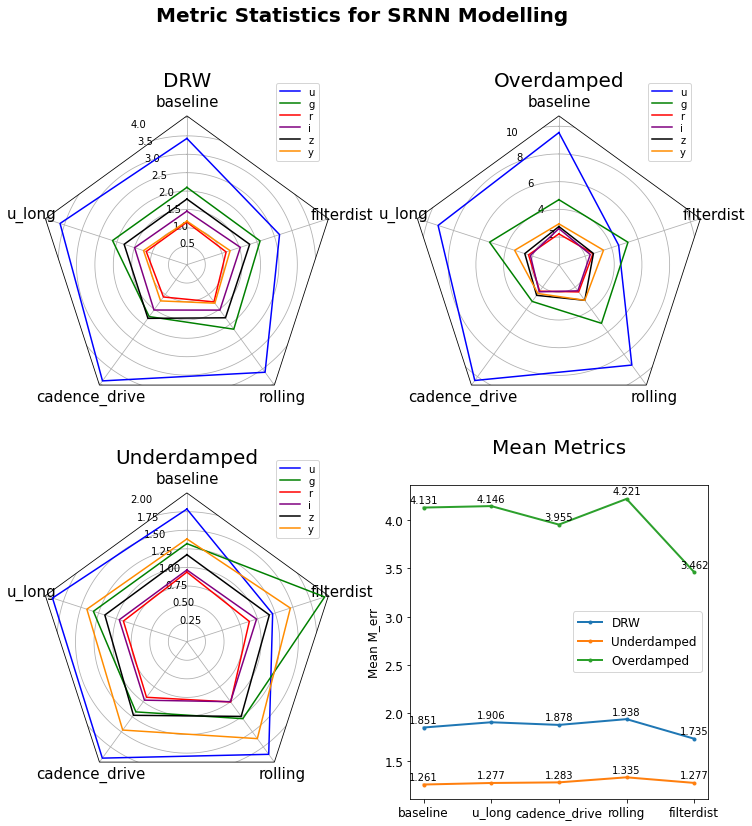

In [ ]:
# link: https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

def cadence_mean(data_dist):
  mean_cad = []
  for i in np.arange(5):
    acc = 0
    for band in band_list:
      acc += data_dist[band][i]
    mean_cad.append(acc/6)
  return mean_cad


data_list_drw = []
for band in drw_dist:
  data_list_drw.append(drw_dist[band])

data_list_over = []
for band in over_dist:
  data_list_over.append(over_dist[band])

data_list_under = []
for band in under_dist:
  data_list_under.append(under_dist[band])



data = [cadence_list, 
        ('DRW', data_list_drw), 
        ('Overdamped', data_list_over),  
        ('Underdamped', data_list_under)  
]


N = len(data[0])
theta = radar_factory(N, frame='circle')

spoke_labels = data.pop(0)
title, case_data = data[0]


N = 5
theta = radar_factory(N, frame='polygon')

fig, axs = plt.subplots(figsize=(12, 12), nrows=2, ncols=2, 
                        subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['blue', 'green','red', 'purple', 'black','darkorange', 'grey']
labels = ('u', 'g', 'r', 'i', 'z', 'y')

n = 0
for ax, (title, case_data) in zip(axs.flat, data):
  if n < 3:
        # ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, size=20, position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0)

            ax.tick_params(axis="x", labelsize=15)
            ax.tick_params(axis="y", labelsize=10)
        ax.set_varlabels(spoke_labels)
        ax.legend(labels, loc=(0.8, .85),
                          labelspacing=0.2, fontsize=10)
        n += 1


# add mean values for different cases

mean_drw = cadence_mean(drw_dist)
mean_under = cadence_mean(under_dist)
mean_over = cadence_mean(over_dist)


axs[1,1].remove()
ax = fig.add_subplot(2, 2, 4)
ax.plot(np.arange(5), mean_drw, label = 'DRW', marker = '.', linewidth = 2)
ax.plot(np.arange(5), mean_under, label = 'Underdamped', marker = '.', linewidth = 2)
ax.plot(np.arange(5), mean_over, label = 'Overdamped', marker = '.', linewidth = 2)

for i in np.arange(5):
  for carma in [mean_drw, mean_under, mean_over]:
    ax.text(x=i,
            y=carma[i]+0.13,
            s=np.round(carma[i],3), 
            horizontalalignment='center', 
            verticalalignment='top',
            fontdict=dict(color='black',size=10),)


ax.legend(loc = 'center right', fontsize = 12)
ax.set_ylabel('Mean M_err', fontsize = 12)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(cadence_list)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_title('Mean Metrics', size=20, position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')


fig.text(0.5, 0.95, 'Metric Statistics for SRNN Modelling',
          horizontalalignment='center', color='black', weight='bold',
          size=20)

plt.show()

In [ ]:
cadence_list

['baseline', 'u_long', 'cadence_drive', 'rolling', 'filterdist']